<a href="https://colab.research.google.com/github/arsalanmubeen/IBA/blob/main/MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-Dimensional Scaling (MDS)

We show how to perform classical MDS on an input $5 \times 5$ distance matrix $D$.  

In [ ]:
import numpy as np
from scipy import linalg as LA
D = np.array([[0,4,3,7,8],[4,0,1,6,7],[3,1,0,5,7],[7,6,5,0,1],[8,7,7,1,0]])
D2 = np.square(D)
print(D)
print(D2)

[[0 4 3 7 8]
 [4 0 1 6 7]
 [3 1 0 5 7]
 [7 6 5 0 1]
 [8 7 7 1 0]]
[[ 0 16  9 49 64]
 [16  0  1 36 49]
 [ 9  1  0 25 49]
 [49 36 25  0  1]
 [64 49 49  1  0]]


We need to use a centering matrix $C$.

In [ ]:
C = np.eye(5) - 0.2*np.ones(5)
print(C)

[[ 0.8 -0.2 -0.2 -0.2 -0.2]
 [-0.2  0.8 -0.2 -0.2 -0.2]
 [-0.2 -0.2  0.8 -0.2 -0.2]
 [-0.2 -0.2 -0.2  0.8 -0.2]
 [-0.2 -0.2 -0.2 -0.2  0.8]]


The preprocessing is to create a matrix $M$ that is $-1/2$ times the squared distance matrix $D2$ that has been ``double centered."  That is we multiply $D2$ by the centering matrix on both sides.  

In [ ]:
M = -0.5* C @ D2 @ C
print(M)

[[ 15.64   4.04   5.74 -11.56 -13.86]
 [  4.04   8.44   6.14  -8.66  -9.96]
 [  5.74   6.14   4.84  -4.96 -11.76]
 [-11.56  -8.66  -4.96  10.24  14.94]
 [-13.86  -9.96 -11.76  14.94  20.64]]


Then the basis for finding of an embedding of the points which may result in distance matrix $D$ is encoded in the eigenbasis of $M$.  

In [ ]:
l,V = LA.eig(M)
print(l)
print(V)

[ 5.22353636e+01+0.j  8.15845236e+00+0.j -3.52724344e+00+0.j
  7.76457094e-16+0.j  2.93342746e+00+0.j]
[[-0.46191632 -0.74658493 -0.14641759  0.4472136   0.08835238]
 [-0.31642756  0.58531803 -0.31307441  0.4472136   0.5091766 ]
 [-0.2997397   0.27356107  0.60018007  0.4472136  -0.5245039 ]
 [ 0.45091998  0.0409948  -0.57553391  0.4472136  -0.51356724]
 [ 0.62716361 -0.15328898  0.43484584  0.4472136   0.44054216]]


These may have imaginary components if the distance matrix $D$ has noise in it.  We remove these for simplicity.  

In [ ]:
s = np.real(np.power(l,0.5))
print(s)

[7.22740366e+00 2.85630047e+00 1.15000194e-16 2.78649797e-08
 1.71272516e+00]


In [ ]:
V2 = V[:,[0,1]]
s2 = np.diag(s[0:2])
print(s2)

[[7.22740366 0.        ]
 [0.         2.85630047]]


The resulting embedding is found by the top $k=2$ eigenvectors scaled by the corresponding eigenvalues.

In [ ]:
Q = V2 @ s2
print(Q)

[[-3.33845572 -2.13247088]
 [-2.28694974  1.67184417]
 [-2.1663398   0.78137262]
 [ 3.25898073  0.11709348]
 [ 4.53276454 -0.43783938]]


We plot the derived $5$ points in their $2$-dimensions.  Note that we can shift all points by the same offset vectors and the pairwise distances are the same.  The classical MDS method we have performed chooses the shift so the average vector of all derived points is exactly $0$.  

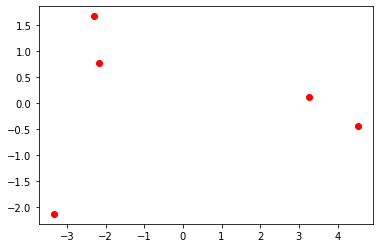

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Q[:,0],Q[:,1],'ro')
plt.show()